In [137]:
import numpy as np
import matplotlib.pyplot as plt

In [138]:
f = 100  # Hz
fs = 1000  # Hz
t_i = 0.0  # s
t_f = 0.5  # s

In [139]:
Ts = 1/fs
n_i = int(t_i // Ts)
n_f = int(t_f // Ts)
time = np.array([n*Ts for n in range(0, n_f)])
signal = np.sin(2*np.pi*f*time)

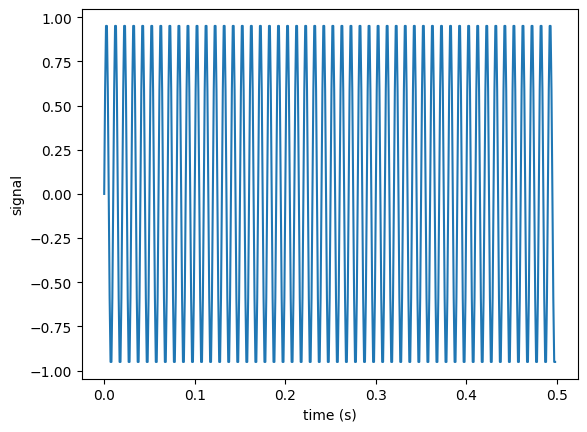

In [140]:
def plot_signal(time, signal):
    fig, ax = plt.subplots(1,1)
    ax.plot(time, signal)
    ax.set_xlabel('time (s)')
    ax.set_ylabel('signal')

plot_signal(time, signal)

0.7078220940000614
0.6566187458021893


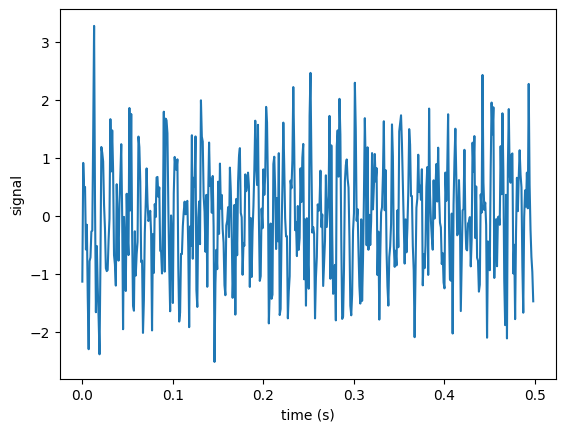

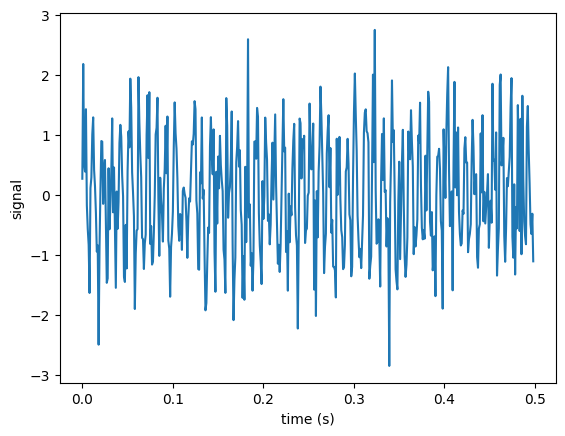

In [155]:
SNR = 0

def calc_snr(signal, noise):
    return 10*np.log10(np.var(signal)/np.var(noise))


def calc_rms(y):
    return np.sqrt(np.mean(y**2))


def my_awgn(signal, snr):
    N = len(signal)
    noise_n = np.random.randn(N)
    noise_n_var = np.var(noise_n)
    # print(np.sqrt(np.sum((noise_n-np.mean(noise_n))**2)/(N)))
    # print(np.sqrt(noise_var))

    signal_var = np.var(signal)
    # snr = 10*np.log10(np.var(signal)/np.var(noise))
    noise_var = signal_var / (10 ** (snr/10))
    noise = noise_n * np.sqrt(noise_var / noise_n_var)
    # print(calc_snr(signal, noise))
    return signal + noise


def add_white_noise(signal, snr_db):
    """
    Generado por bing chat (chatGPT) ---- DANGER !!!
    Add white noise to a signal with a specific SNR in dB
    """
    # Calculate signal power
    sig_power = np.sum(signal ** 2) / len(signal)

    # Calculate noise power
    noise_power = sig_power / (10 ** (snr_db / 10))
    
    # Generate white noise
    noise = np.random.normal(0, np.sqrt(noise_power), len(signal))
    
    # Add noise to signal
    noisy_signal = signal + noise
    
    return noisy_signal


signal_n = my_awgn(signal, SNR)
plot_signal(time, signal_n)
print(calc_rms(signal_n-signal))

signal_n = add_white_noise(signal, SNR)
plot_signal(time, signal_n)
print(calc_rms(signal_n-signal))